In [1]:
#Deklarasi library yang akan digunakan
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Mengimport dan preprocessing data dan augmentation data, serta pembagian data ke train dan validation
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

#Train data
traingenerator = datagen.flow_from_directory(
        "15-Scene Image Dataset/15-Scene",
        target_size=(28, 28),
        batch_size=3588,
        subset='training',
        class_mode='categorical')

#Validation data
valgenerator = datagen.flow_from_directory(
        "15-Scene Image Dataset/15-Scene",
        target_size=(28, 28),
        batch_size=897,
        subset='validation',
        class_mode='categorical')

Found 3592 images belonging to 15 classes.
Found 893 images belonging to 15 classes.


In [3]:
#Split data ke train dan test
x_train,y_train = next(traingenerator)
x_test,y_test = next(valgenerator)

In [4]:
#Melihat dimensi array
print(x_train.shape)

(3588, 28, 28, 3)


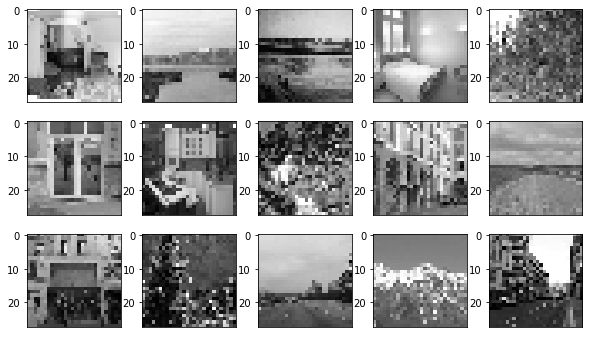

In [5]:
#Menampilkan data apakah sudah terimport
plt.figure(figsize=(10,10))
for i in range(15) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(x_train[i])
plt.show()

In [6]:
#Membuat model CNN

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

#Convolution Pertama
model.add(Conv2D(32, kernel_size=(3,3),activation="relu",input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

#Convolution Kedua
model.add(Conv2D(32, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

#Convolution Ketiga
model.add(Conv2D(32, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.10))

model.add(Flatten())

model.add(Dense(28, activation="relu"))
model.add(Dense(15, activation='softmax'))

In [7]:
#Melihat summary dari model yang telah dibuah
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [8]:
#Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Fitting Model yang telah dibuat dengan data x_train dan y_train
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
101/101 [==============================] - 7s 46ms/step - loss: 2.6877 - accuracy: 0.0898 - val_loss: 2.6304 - val_accuracy: 0.1755
Epoch 2/100
101/101 [==============================] - 4s 39ms/step - loss: 2.5763 - accuracy: 0.1384 - val_loss: 2.5226 - val_accuracy: 0.1616
Epoch 3/100
101/101 [==============================] - 4s 39ms/step - loss: 2.4218 - accuracy: 0.1812 - val_loss: 2.3142 - val_accuracy: 0.2451
Epoch 4/100
101/101 [==============================] - 5s 48ms/step - loss: 2.2772 - accuracy: 0.2329 - val_loss: 2.1726 - val_accuracy: 0.2479
Epoch 5/100
101/101 [==============================] - 8s 78ms/step - loss: 2.1652 - accuracy: 0.2614 - val_loss: 2.1370 - val_accuracy: 0.3120
Epoch 6/100
101/101 [==============================] - 6s 61ms/step - loss: 2.0542 - accuracy: 0.3069 - val_loss: 2.0163 - val_accuracy: 0.3677
Epoch 7/100
101/101 [==============================] - 6s 64ms/step - loss: 1.9638 - accuracy: 0.3354 - val_loss: 1.9417 - val_accuracy:

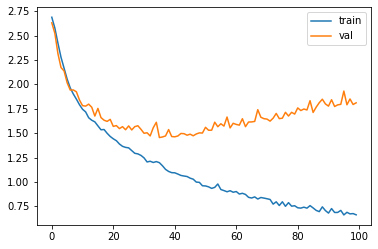

In [13]:
#Visualisasi untuk loss train dan val dari model
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

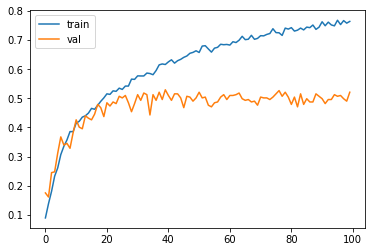

In [14]:
#Visualisasi untuk accuracy train dan val dari model
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

In [15]:
#Mengecek akurasi dari train dan test
print("Training Accuracy:"), print(history.history['accuracy'][-1])
print("Testing Accuracy:"), print (history.history['val_accuracy'][-1])

Training Accuracy:
0.7637039422988892
Testing Accuracy:
0.5208913683891296


(None, None)

In [16]:
#Test prediksi x_test
predicted = model.predict(x_test)
predicted[0]

28/28 [==============================] - 0s 11ms/step


array([4.4210915e-02, 5.9599271e-05, 2.3564585e-03, 5.2434187e-02,
       1.2986358e-01, 5.0445083e-06, 2.8292402e-06, 1.8677209e-05,
       4.2428900e-03, 3.6396152e-05, 8.5842053e-08, 2.0196216e-04,
       1.9603752e-02, 7.4692386e-01, 3.9684564e-05], dtype=float32)